# Comparison of parameters for jet tagging in fast sim and full sim

Notes: 

- `jet_npfcand` and `jet_nconst` is the same / filled with the same value in full sim


In [1]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path_fullsim = "/home/saaumill/FullSimTagger/src/fullsim_tree.root"
path_fastsim = "/eos/experiment/fcc/ee/jet_flavour_tagging/winter2023/samples_v2/stage2_Hbb.root"

file_fu = uproot.open(path_fullsim)
tree_fu = file_fu["tree;1"]

file_fa = uproot.open(path_fastsim)
tree_fa = file_fa["tree;1"]

In [3]:
df_fa = tree_fa.arrays(entry_start=0, entry_stop=50, library="np")
df_fu = tree_fu.arrays(entry_start=0, entry_stop=50, library="np")

Check if trees have the same key. Apart from `['event_number','n_hit','n_part']` @Dolores why do we need them when initializing?

In [4]:
list_fu = [item for item in tree_fu.keys() if item not in ['event_number','n_hit','n_part']]

set_fa = set(tree_fa.keys())
set_fu = set(list_fu)

print(set_fa == set_fu)

True


Now let's check if the distributions look the same!

### recojet_isX

In [5]:
def histograms(keys, n, k, figsize=(13, 2), bins=50, conc=False):
    fig, axs = plt.subplots(n, k, figsize=figsize)
    
    for i, ax in enumerate(axs.flat):
        ax.set_title(keys[i])
        if conc==False:
            ax.hist(df_fa[keys[i]], bins=bins, alpha=0.55, label='FastSim')
            ax.hist(df_fu[keys[i]], bins=bins, alpha=0.55, label='FullSim')
        else: 
            ax.hist(np.concatenate(df_fa[keys[i]]), bins=bins, alpha=0.55, label='FastSim')
            ax.hist(np.concatenate(df_fu[keys[i]]), bins=bins, alpha=0.55, label='FullSim')
    
    plt.legend()
    plt.tight_layout()

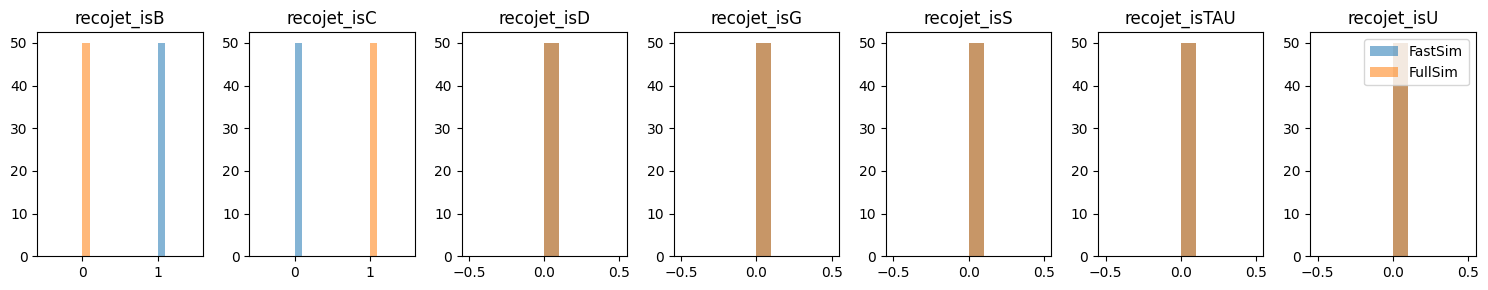

In [6]:
keys = ['recojet_isB',
 'recojet_isC',
 'recojet_isD',
 'recojet_isG',
 'recojet_isS',
 'recojet_isTAU',
 'recojet_isU']

histograms(keys, 1, 7, figsize=(15, 3), bins=10)

Well... not sure that goes wrong here. I definitely use b quarks for fullsim, why is it marked as c? I double checked the PDG IDs.

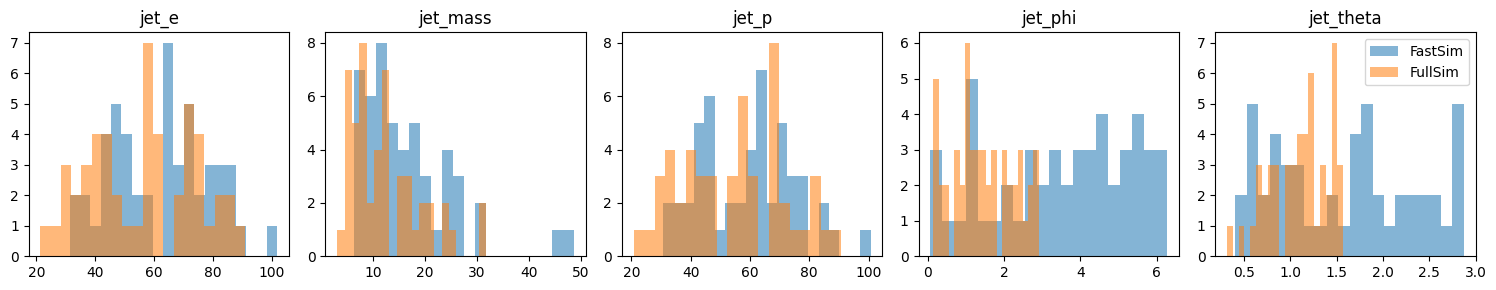

In [7]:
keys = ['jet_e',
 'jet_mass',
 'jet_p',
 'jet_phi',
 'jet_theta']


histograms(keys, 1, 5, figsize=(15, 3), bins=20)

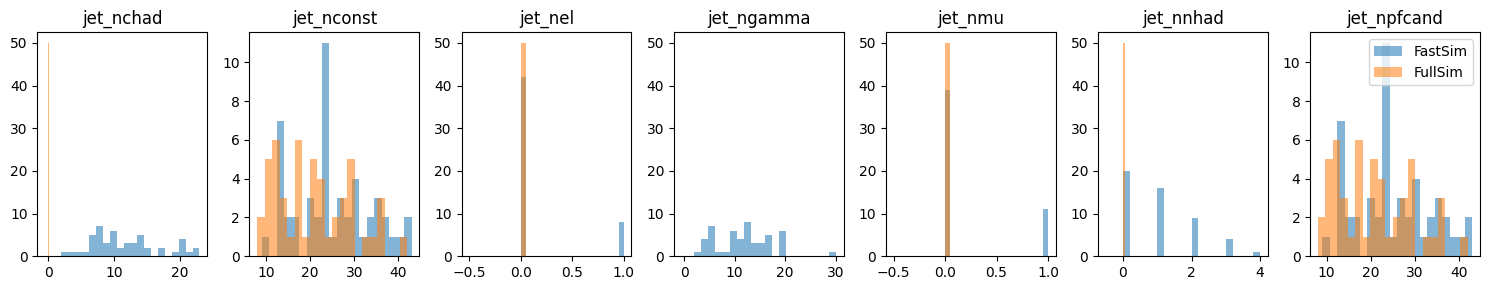

In [8]:
keys = ['jet_nchad',
 'jet_nconst',
 'jet_nel',
 'jet_ngamma',
 'jet_nmu',
 'jet_nnhad',
 'jet_npfcand']

histograms(keys, 1, 7, figsize=(15, 3), bins=20)

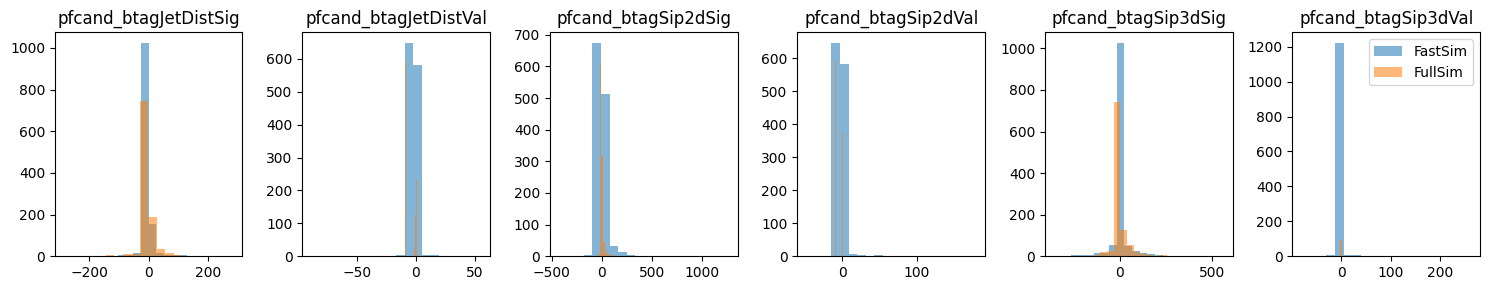

In [9]:
keys = ['pfcand_btagJetDistSig',
 'pfcand_btagJetDistVal',
 'pfcand_btagSip2dSig',
 'pfcand_btagSip2dVal',
 'pfcand_btagSip3dSig',
 'pfcand_btagSip3dVal']

histograms(keys, 1, 6, figsize=(15, 3), bins=20, conc=True)

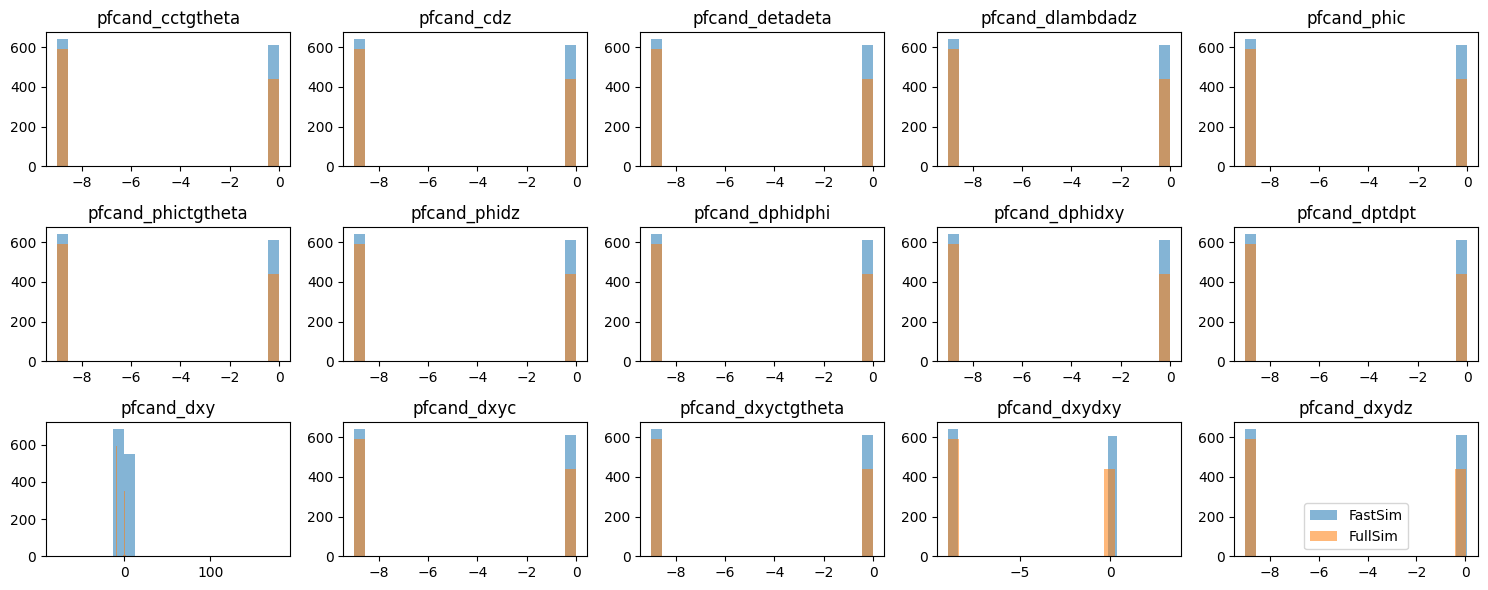

In [10]:
keys = ['pfcand_cctgtheta',
 'pfcand_cdz',
 'pfcand_detadeta',
 'pfcand_dlambdadz',
 'pfcand_phic',
 'pfcand_phictgtheta',
 'pfcand_phidz',
 'pfcand_dphidphi',
 'pfcand_dphidxy',
 'pfcand_dptdpt',
 'pfcand_dxy',
 'pfcand_dxyc',
 'pfcand_dxyctgtheta',
 'pfcand_dxydxy',
 'pfcand_dxydz',
 'pfcand_dz',
 'pfcand_dzdz']

histograms(keys, 3, 5, figsize=(15, 6), bins=20, conc=True)

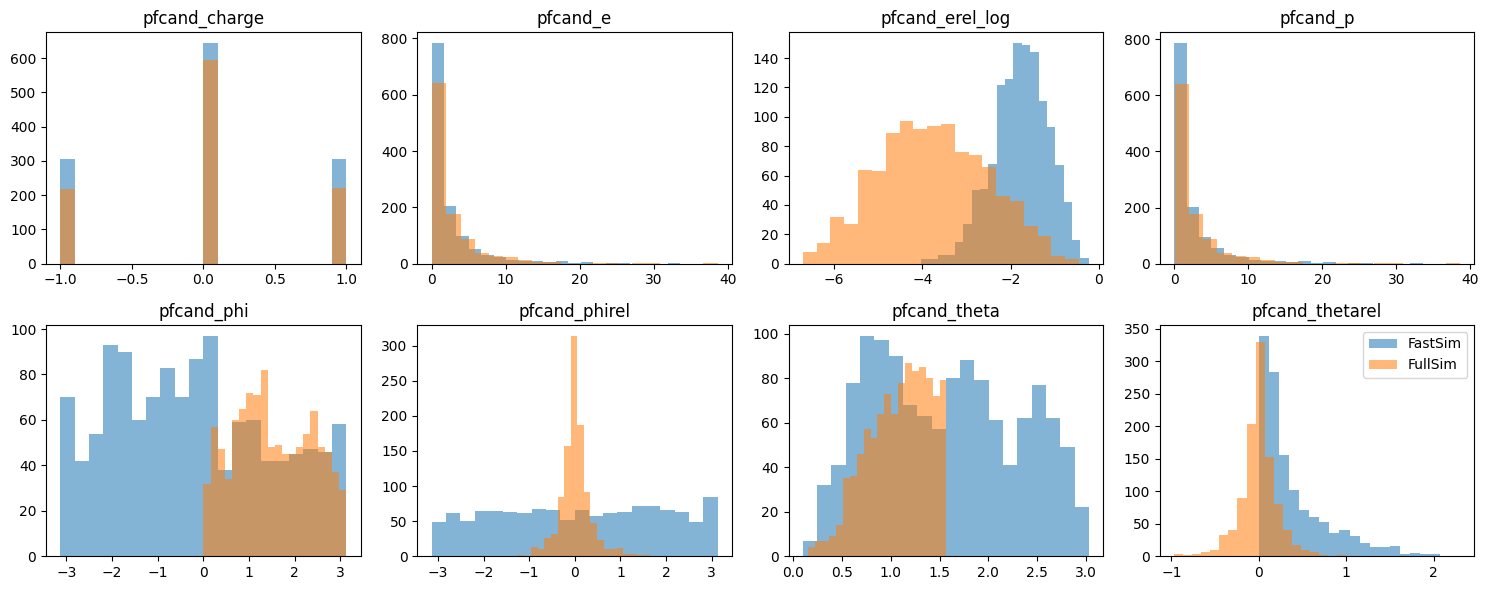

In [11]:
keys= [ 'pfcand_charge',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel']

histograms(keys, 2, 4, figsize=(15, 6), bins=20, conc=True)

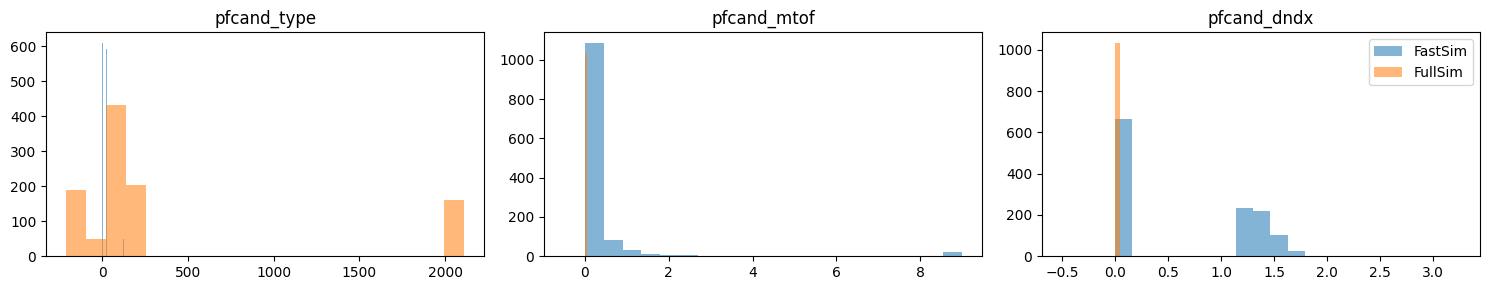

In [12]:
keys = ['pfcand_type', 'pfcand_mtof', 'pfcand_dndx']

histograms(keys, 1, 3, figsize=(15, 3), bins=20, conc=True)

In [13]:
set_fa

{'jet_e',
 'jet_mass',
 'jet_nchad',
 'jet_nconst',
 'jet_nel',
 'jet_ngamma',
 'jet_nmu',
 'jet_nnhad',
 'jet_npfcand',
 'jet_p',
 'jet_phi',
 'jet_theta',
 'pfcand_btagJetDistSig',
 'pfcand_btagJetDistVal',
 'pfcand_btagSip2dSig',
 'pfcand_btagSip2dVal',
 'pfcand_btagSip3dSig',
 'pfcand_btagSip3dVal',
 'pfcand_cctgtheta',
 'pfcand_cdz',
 'pfcand_charge',
 'pfcand_detadeta',
 'pfcand_dlambdadz',
 'pfcand_dndx',
 'pfcand_dphidphi',
 'pfcand_dphidxy',
 'pfcand_dptdpt',
 'pfcand_dxy',
 'pfcand_dxyc',
 'pfcand_dxyctgtheta',
 'pfcand_dxydxy',
 'pfcand_dxydz',
 'pfcand_dz',
 'pfcand_dzdz',
 'pfcand_e',
 'pfcand_erel_log',
 'pfcand_isChargedHad',
 'pfcand_isEl',
 'pfcand_isGamma',
 'pfcand_isMu',
 'pfcand_isNeutralHad',
 'pfcand_mtof',
 'pfcand_p',
 'pfcand_phi',
 'pfcand_phic',
 'pfcand_phictgtheta',
 'pfcand_phidz',
 'pfcand_phirel',
 'pfcand_theta',
 'pfcand_thetarel',
 'pfcand_type',
 'recojet_isB',
 'recojet_isC',
 'recojet_isD',
 'recojet_isG',
 'recojet_isS',
 'recojet_isTAU',
 'recoj